### Imports 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##### 1. Chargement des données

In [36]:
df = pd.read_csv('./Data/houses_Madrid.csv')

##### 2. Aperçu des premières lignes du dataset ainsi que des informations générales le concernant.

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

##### 3. Gestion des valeurs manquantes.

La gestion des valeurs manquantes est importante dans la préparation des données.  
Elles peuvent être gérée par imputation, qui consiste a remplacer les valeurs manquantes ou pas suppression. Ce choix va se faire en fonction de la quantité de valeurs manquantes ainsi que de l'importance de la colonne. 

Dans un premier temps, on calcule les pourcentages de valeurs manquantes par colonne.

In [37]:
missing_values = df.isnull().mean() * 100
print(missing_values[missing_values > 0])

sq_mt_built                       0.579524
sq_mt_useful                     62.156195
n_bathrooms                       0.073590
n_floors                         93.390672
sq_mt_allotment                  93.413669
latitude                        100.000000
longitude                       100.000000
raw_address                      25.135682
street_name                      27.159415
street_number                    71.023825
portal                          100.000000
floor                            11.990617
is_floor_under                    5.381290
door                            100.000000
rent_price_by_area              100.000000
house_type_id                     1.798363
is_new_development                4.562598
built_year                       54.006071
has_central_heating              37.411462
has_individual_heating           37.411462
are_pets_allowed                100.000000
has_ac                           48.436206
has_fitted_wardrobes             38.372735
has_lift   

Puis, on impute les valeurs manquantes dans les colonnes importantes.

In [ ]:
df_cleaned = df.copy()

df_cleaned['sq_mt_built'].fillna(df_cleaned['sq_mt_built'].median(), inplace=True)
df_cleaned['sq_mt_useful'].fillna(df_cleaned['sq_mt_built'] * 0.8, inplace=True)
df_cleaned['built_year'].fillna(df_cleaned['built_year'].median(), inplace=True)
df_cleaned['n_bathrooms'].fillna(df_cleaned['n_bathrooms'].mode()[0], inplace=True)
df_cleaned[['has_central_heating', 'has_individual_heating']] = df_cleaned[['has_central_heating', 'has_individual_heating']].fillna(0)
df_cleaned['floor'].fillna(1, inplace=True)

equipment_columns = ['has_pool', 'has_terrace', 'is_furnished', 'has_garden', 'has_storage_room', 'has_balcony', 'has_lift', 'has_ac']

df_cleaned[equipment_columns] = df_cleaned[equipment_columns].fillna(0)




Pour terminer, on supprime les colonnes qui ont plus de 40% de valeurs manquantes et/ou qui ne sont pas importantes.

In [39]:
columns_to_drop = missing_values[missing_values > 40].index
columns_to_drop_additional = ['raw_address', 'street_name', 'is_floor_under']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.drop(columns=columns_to_drop_additional)

print(df_cleaned.isnull().sum())

Unnamed: 0                    0
id                            0
title                         0
subtitle                      0
sq_mt_built                   0
n_rooms                       0
n_bathrooms                   0
is_exact_address_hidden       0
floor                         0
neighborhood_id               0
operation                     0
rent_price                    0
is_rent_price_known           0
buy_price                     0
buy_price_by_area             0
is_buy_price_known            0
house_type_id               391
is_renewal_needed             0
is_new_development          992
has_central_heating           0
has_individual_heating        0
has_fitted_wardrobes       8343
has_lift                      0
is_exterior                3043
energy_certificate            0
has_parking                   0
dtype: int64


##### 4. Gestion des doublons

In [40]:
duplicates = df_cleaned.duplicated(subset=['id'])
df_cleaned = df_cleaned[~duplicates]

##### 5. Traitement des valeurs aberrantes

On visualise d'abord les outliers sur les colonnes critiques.

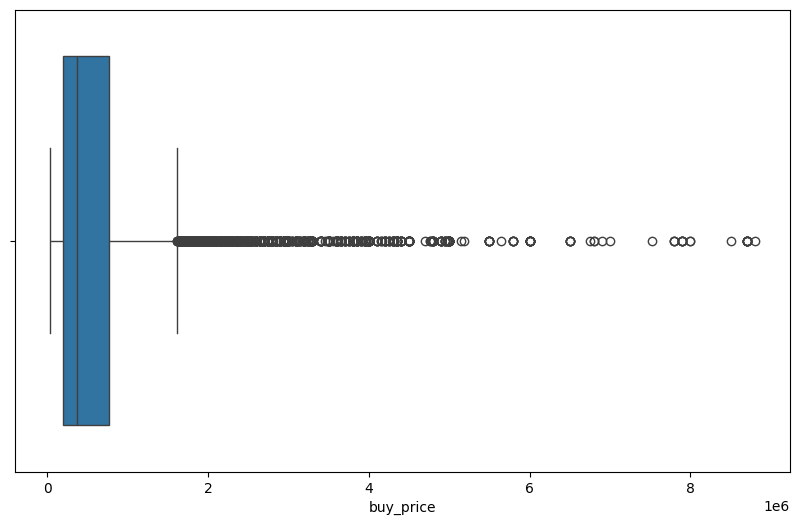

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['buy_price'])
plt.show()

On supprime les valeurs aberrantes dans les prix d'achat.

In [42]:
Q1 = df_cleaned['buy_price'].quantile(0.25)
Q3 = df_cleaned['buy_price'].quantile(0.75)
IQR = Q3 - Q1

On garde les données dans l'intervalle [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

In [43]:
df_cleaned = df_cleaned[(df_cleaned['buy_price'] >= Q1 - 1.5 * IQR) & (df_cleaned['buy_price'] <= Q3 + 1.5 * IQR)]

##### 6. Normalisation / Standardisation

Certaines colonnes peuvent avoir des échelles différentes, ce qui peut poser problème pour certains algorithmes de machine learning. Une normalisation ou une standardisation peut être nécessaire.

In [44]:
scaler = StandardScaler()
df_cleaned[['sq_mt_built', 'buy_price']] = scaler.fit_transform(df_cleaned[['sq_mt_built', 'buy_price']])

In [45]:
print(df_cleaned.isnull().sum())

Unnamed: 0                    0
id                            0
title                         0
subtitle                      0
sq_mt_built                   0
n_rooms                       0
n_bathrooms                   0
is_exact_address_hidden       0
floor                         0
neighborhood_id               0
operation                     0
rent_price                    0
is_rent_price_known           0
buy_price                     0
buy_price_by_area             0
is_buy_price_known            0
house_type_id               389
is_renewal_needed             0
is_new_development          941
has_central_heating           0
has_individual_heating        0
has_fitted_wardrobes       7741
has_lift                      0
is_exterior                2174
energy_certificate            0
has_parking                   0
dtype: int64


##### 7. Sauvegarde du dataset nettoyé et préparé.

In [31]:
df_cleaned.to_csv('./Data/houses_Madrid_cleaned.csv', index=False)